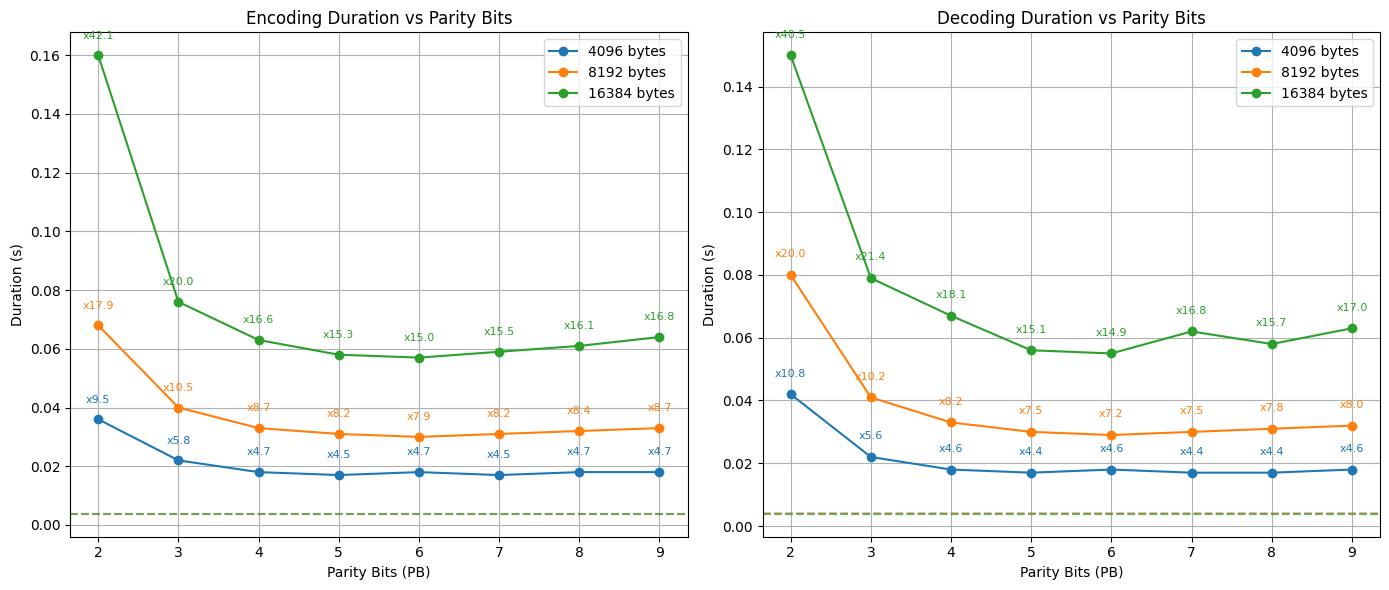

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_enc = {
    "PB":    [0, 2, 3, 4, 5, 6, 7, 8, 9],
    "4096":  [0.0038, 0.036, 0.022, 0.018, 0.017, 0.018, 0.017, 0.018, 0.018],
    "8192":  [0.0038, 0.068, 0.040, 0.033, 0.031, 0.030, 0.031, 0.032, 0.033],
    "16384": [0.0038, 0.160, 0.076, 0.063, 0.058, 0.057, 0.059, 0.061, 0.064]
}

data_dec = {
    "PB":    [0, 2, 3, 4, 5, 6, 7, 8, 9],
    "4096":  [0.0039, 0.042, 0.022, 0.018, 0.017, 0.018, 0.017, 0.017, 0.018],
    "8192":  [0.004, 0.080, 0.041, 0.033, 0.030, 0.029, 0.030, 0.031, 0.032],
    "16384": [0.0037, 0.150, 0.079, 0.067, 0.056, 0.055, 0.062, 0.058, 0.063]
}

df_enc = pd.DataFrame(data_enc)
df_dec = pd.DataFrame(data_dec)

plt.figure(figsize=(14, 6))

# ======== ENCODING ========
plt.subplot(1, 2, 1)
for size in ["4096", "8192", "16384"]:
    baseline = df_enc[size][0]
    plt.plot(df_enc["PB"][1:], df_enc[size][1:], marker="o", label=f"{size} bytes")
    plt.axhline(y=baseline, color=plt.gca().lines[-1].get_color(), linestyle="--", alpha=0.5)

    for pb, val in zip(df_enc["PB"][1:], df_enc[size][1:]):
        # plt.plot([pb, pb], [baseline, val], color=plt.gca().lines[-1].get_color(), linestyle=":", alpha=0.6)
        ratio = val / baseline
        plt.text(pb, val + .005, f"x{ratio:.1f}", ha="center", va="bottom", fontsize=8, color=plt.gca().lines[-1].get_color())

plt.title("Encoding Duration vs Parity Bits")
plt.xlabel("Parity Bits (PB)")
plt.ylabel("Duration (s)")
plt.legend()
plt.grid(True)

# ======== DECODING ========
plt.subplot(1, 2, 2)
for size in ["4096", "8192", "16384"]:
    baseline = df_dec[size][0]
    plt.plot(df_dec["PB"][1:], df_dec[size][1:], marker="o", label=f"{size} bytes")
    plt.axhline(y=baseline, color=plt.gca().lines[-1].get_color(), linestyle="--", alpha=0.5)

    for pb, val in zip(df_dec["PB"][1:], df_dec[size][1:]):
        # plt.plot([pb, pb], [baseline, val], color=plt.gca().lines[-1].get_color(), linestyle=":", alpha=0.6)
        ratio = val / baseline
        plt.text(pb, val + .005, f"x{ratio:.1f}", ha="center", va="bottom", fontsize=8, color=plt.gca().lines[-1].get_color())

plt.title("Decoding Duration vs Parity Bits")
plt.xlabel("Parity Bits (PB)")
plt.ylabel("Duration (s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


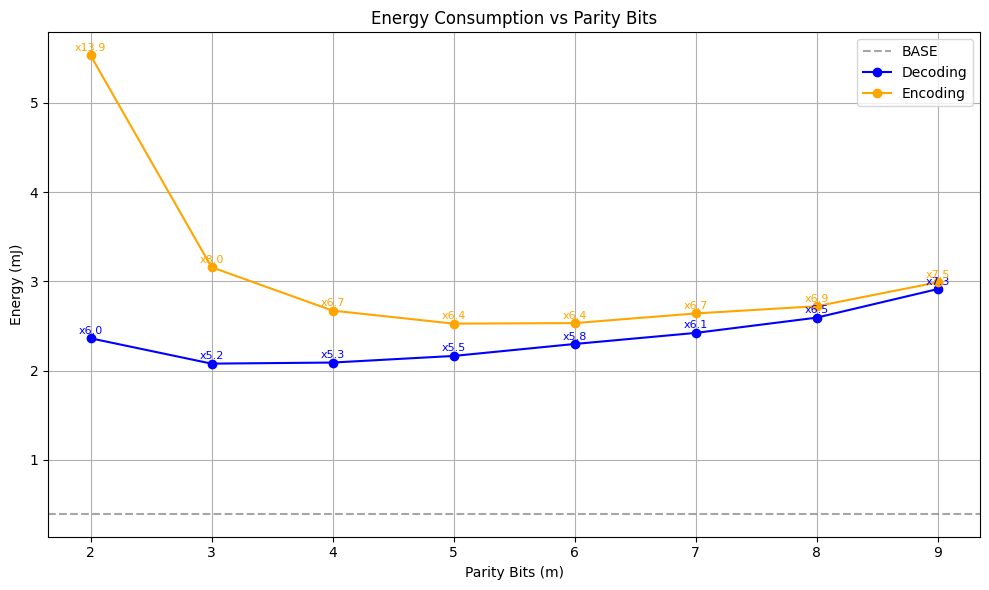

In [4]:
import matplotlib.pyplot as plt
import re

log_text = """
[BASE] Duration=1ms Energy=0.397mJ
[DECODING] m=2: Duration=100ms, Energy=2.363mJ
[DECODING] m=3: Duration=22ms, Energy=2.079mJ
[DECODING] m=4: Duration=22ms, Energy=2.091mJ
[DECODING] m=5: Duration=22ms, Energy=2.165mJ
[DECODING] m=6: Duration=22ms, Energy=2.299mJ
[DECODING] m=7: Duration=100ms, Energy=2.423mJ
[DECODING] m=8: Duration=101ms, Energy=2.594mJ
[DECODING] m=9: Duration=102ms, Energy=2.914mJ
[ENCODING] m=2: Duration=210ms, Energy=5.533mJ
[ENCODING] m=3: Duration=110ms, Energy=3.159mJ
[ENCODING] m=4: Duration=101ms, Energy=2.673mJ
[ENCODING] m=5: Duration=100ms, Energy=2.527mJ
[ENCODING] m=6: Duration=100ms, Energy=2.533mJ
[ENCODING] m=7: Duration=101ms, Energy=2.641mJ
[ENCODING] m=8: Duration=101ms, Energy=2.722mJ
[ENCODING] m=9: Duration=102ms, Energy=2.990mJ
"""

base_energy = float(re.search(r"\[BASE\].*Energy=([\d\.]+)mJ", log_text).group(1))

dec_data = {}
enc_data = {}

for line in log_text.splitlines():
    line = line.strip()
    if line.startswith("[DECODING]"):
        m = int(re.search(r"m=(\d+)", line).group(1))
        energy = float(re.search(r"Energy=([\d\.]+)mJ", line).group(1))
        dec_data[m] = energy
    elif line.startswith("[ENCODING]"):
        m = int(re.search(r"m=(\d+)", line).group(1))
        energy = float(re.search(r"Energy=([\d\.]+)mJ", line).group(1))
        enc_data[m] = energy

plt.figure(figsize=(10, 6))

plt.axhline(y=base_energy, color='gray', linestyle='--', alpha=0.7, label='BASE')

m_values = list(dec_data.keys())
dec_energies = list(dec_data.values())
plt.plot(m_values, dec_energies, marker='o', color='blue', label='Decoding')

enc_energies = list(enc_data.values())
plt.plot(m_values, enc_energies, marker='o', color='orange', label='Encoding')

for m, val in zip(m_values, dec_energies):
    ratio = val / base_energy
    plt.text(m, val + 0.05, f"x{ratio:.1f}", ha='center', fontsize=8, color='blue')

for m, val in zip(m_values, enc_energies):
    ratio = val / base_energy
    plt.text(m, val + 0.05, f"x{ratio:.1f}", ha='center', fontsize=8, color='orange')

plt.title("Energy Consumption vs Parity Bits")
plt.xlabel("Parity Bits (m)")
plt.ylabel("Energy (mJ)")
plt.xticks(m_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


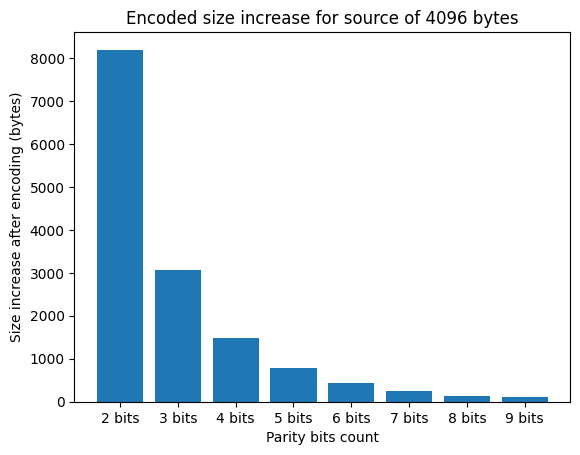

In [ ]:
import matplotlib.pyplot as plt

def calculate_encoded_size(dsize: int, m: int) -> int:
    n = (1 << m) - 1
    k = n - m
    blocks = (dsize * 8 + k - 1) // k
    return (blocks * n + 7) // 8

def encoded_sizes_for_parity_bits(dsize: int, parity_bits_list: list[int]) -> dict[int, int]:
    result = {}
    for m in parity_bits_list:
        result[m] = calculate_encoded_size(dsize, m)
    return result

def plot_encoded_size_increase(sizes: dict[int, int], decoded_size: int):
    parity_bits_list = list(sizes.keys())
    encoded_sizes = list(sizes.values())
    increases = [encoded - decoded_size for encoded in encoded_sizes]

    plt.bar([f"{m} bits" for m in parity_bits_list], increases)
    plt.xlabel("Parity bits count")
    plt.ylabel("Size increase after encoding (bytes)")
    plt.title(f"Encoded size increase for source of {decoded_size} bytes")
    plt.show()

parity_bits = [2, 3, 4, 5, 6, 7, 8, 9]
decoded_size = 4096
sizes = encoded_sizes_for_parity_bits(decoded_size, parity_bits)
plot_encoded_size_increase(sizes, decoded_size)